In [2]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
df = yf.download('BBCA.JK', start='2015-05-15', end='2025-05-15', multi_level_index = False)
df.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet

,ds,y
0,2015-05-15,2235.163574
1,2015-05-18,2247.557861
2,2015-05-19,2255.821045
3,2015-05-20,2293.004883
4,2015-05-21,2334.320068
...,...,...
2460,2025-05-06,9025.000000
2461,2025-05-07,9075.000000
2462,2025-05-08,8975.000000
2463,2025-05-09,9000.000000


In [5]:
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

In [6]:

# Drop rows with NaN or infinite values
train_df = train_df.dropna().copy()
train_df = train_df[np.isfinite(train_df['y'])]

In [7]:
model = Prophet()
model.fit(train_df)

13:13:52 - cmdstanpy - INFO - Chain [1] start processing
13:13:53 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
#future = model.make_future_dataframe(periods=len(test_df), freq='D')
future = test_df 
forecast = model.predict(future)

In [9]:
forecast_test = forecast[['ds', 'yhat']].set_index('ds')
test_df = test_df.set_index('ds')

In [10]:
comparison_df = test_df.join(forecast_test, how='left').dropna()

In [11]:
mse = mean_squared_error(comparison_df['y'], comparison_df['yhat'])
print("RMSE (rupiah):", np.sqrt(mse))

RMSE (rupiah): 809.5940617718481


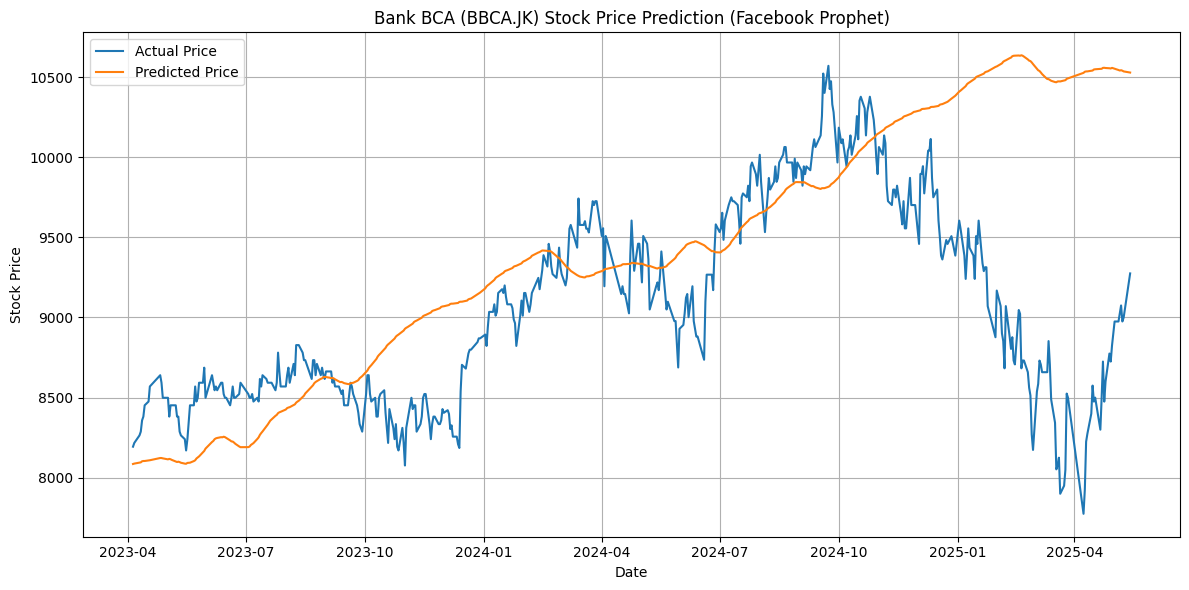

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['y'], label='Actual Price')
plt.plot(comparison_df.index, comparison_df['yhat'], label='Predicted Price')
plt.title(f"Bank BCA (BBCA.JK) Stock Price Prediction (Facebook Prophet)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()